# Palmer Penguins 

This notebook contains my analysis of the palmer penguins data set.

First we need to load the dataset to see what we are working with.

In [1]:
from palmerpenguins import load_penguins

# Load the palmerpenguins dataset
penguins = load_penguins()

# Display the first few rows of the dataset to verify that it's loaded correctly
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [1]:
# Using Pandas Groupby function to get the min and max body mass for each penguin

import pandas as pd
from palmerpenguins import load_penguins

# Load the palmerpenguins dataset
penguins = load_penguins()

# Use GroupBy Function to Group different variables together 
min_max_mean_body_mass = penguins.groupby('species')['body_mass_g'].agg(['min', 'max', 'mean']).round(1)
min_max_mean_bill_length_mm = penguins.groupby('species')['bill_length_mm'].agg(['min', 'max', 'mean']).round(1)
min_max_mean_bill_depth_mm = penguins.groupby('species')['bill_length_mm'].agg(['min', 'max', 'mean']).round(1)
min_max_mean_flipper_length_mm = penguins.groupby('species')['bill_length_mm'].agg(['min', 'max', 'mean']).round(1)

print(min_max_mean_body_mass)
print(min_max_mean_bill_depth_mm)
print(min_max_mean_bill_length_mm)
print(min_max_mean_flipper_length_mm)

              min     max    mean
species                          
Adelie     2850.0  4775.0  3700.7
Chinstrap  2700.0  4800.0  3733.1
Gentoo     3950.0  6300.0  5076.0
            min   max  mean
species                    
Adelie     32.1  46.0  38.8
Chinstrap  40.9  58.0  48.8
Gentoo     40.9  59.6  47.5
            min   max  mean
species                    
Adelie     32.1  46.0  38.8
Chinstrap  40.9  58.0  48.8
Gentoo     40.9  59.6  47.5
            min   max  mean
species                    
Adelie     32.1  46.0  38.8
Chinstrap  40.9  58.0  48.8
Gentoo     40.9  59.6  47.5


/var/folders/_2/p_x1fkk14ns5m51spy5d7j_00000gn/T/ipykernel_4450/1065341890.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Explore the distribution of species across the 3 Islands. https://www.youtube.com/watch?v=8fWd5CdVKqE

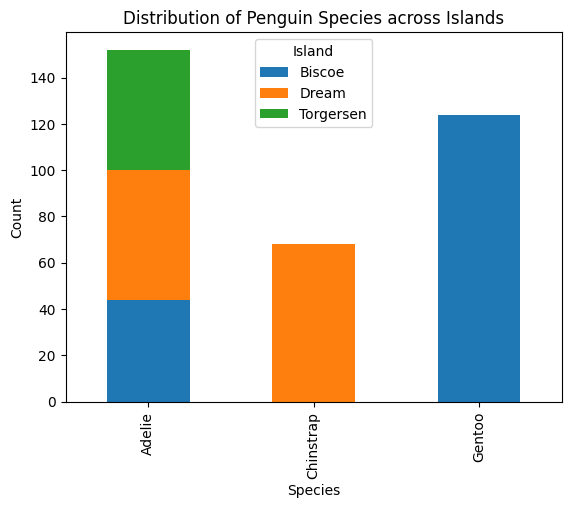

In [3]:
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt

# Load the Palmer Penguin dataset
penguins = load_penguins()

# Aggregate the data to count the occurrences of each species on each island
species_island_counts = penguins.groupby(['species', 'island']).size().unstack(fill_value=0)

# Plot the stacked bar chart
species_island_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Distribution of Penguin Species across Islands")

# Show the plot
plt.legend(title='Island')  # Add legend with the island names
plt.show()



https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

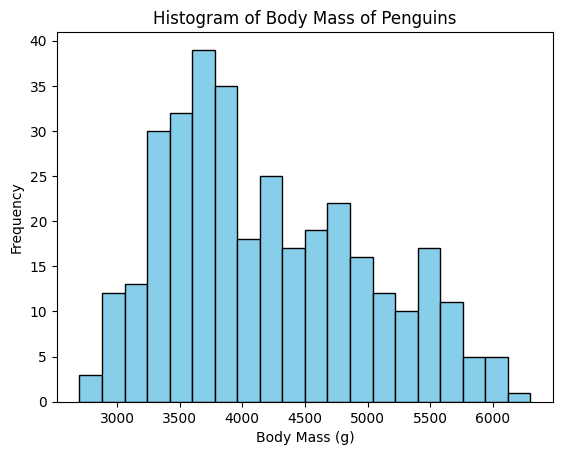

In [2]:
import pandas as pd
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt

# Load penguins data
penguins = load_penguins()

# Select the 'body_mass_g' variable
body_mass = penguins['body_mass_g']

# Create the histogram - Bins is the number of intervals in the histogram 
plt.hist(body_mass, bins=20, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Histogram of Body Mass of Penguins')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Pearson Correlation Coefficient

https://seaborn.pydata.org/tutorial/introduction.html

Correlation coefficient: 0.87


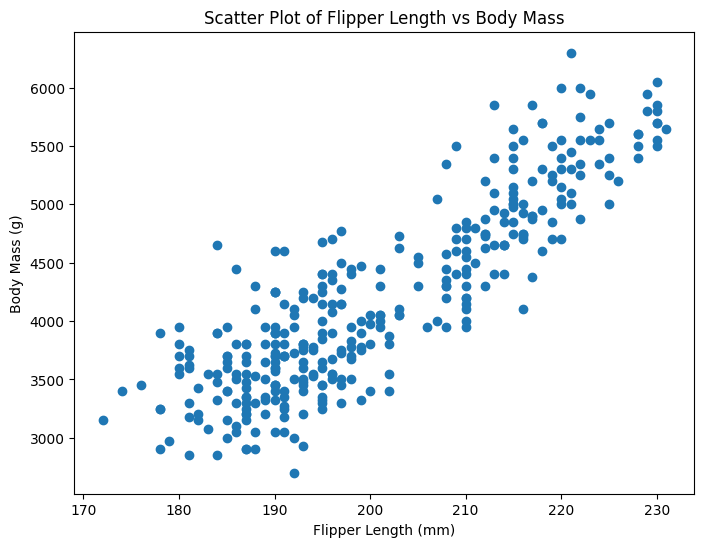

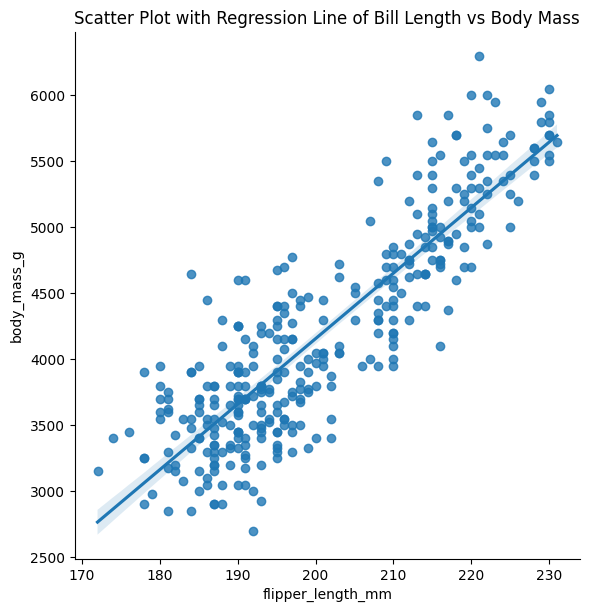

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from palmerpenguins import load_penguins

# Load the palmerpenguins dataset
penguins = load_penguins()

# Remove rows with null values in either 'flipper_length_mm' or 'body_mass_g' columns
penguins_cleaned = penguins.dropna(subset=['flipper_length_mm', 'body_mass_g'])

# Compute correlation - .corr automatiaclly applies Pearson's theory
correlation = penguins_cleaned['flipper_length_mm'].corr(penguins_cleaned['body_mass_g']).round(2)
print("Correlation coefficient:", correlation)

# Visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(penguins_cleaned['flipper_length_mm'], penguins_cleaned['body_mass_g'])
plt.title('Scatter Plot of Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

# Seaborn scatter plot with regression line
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=penguins_cleaned, height=6)
plt.title('Scatter Plot with Regression Line of Bill Length vs Body Mass')
plt.show()